# Lambda School, Intro to Data Science, Day 4!

### What we'll learn:

#### Descriptive Statistics
- Standard Deviation

#### Inferential Statistics
- **Null Hypothesis Significance Testing**
- Z-scores
- Confidence Intervals

### *How* we'll learn:

#### Without the agonizing pain, hopefully!

> **If you can program a computer, you have superpowers** when it comes to learning statistics. Because being able to program allows you to **tinker** with the most fundamental ideas in statistics, the way you might have tinkered with electronics, or with mechanical things, or with music, or with sports. And so I want you to go out, and to attack statistical problems with a feeling of **joy**, in the spirit of **play**, and **not from a position of fear and self-doubt.** —*John Rauser, [Statistics Without the Agonizing Pain](https://www.youtube.com/watch?v=5Dnw46eC-0o)*

#### Computationally
- For-loops
- Random number generators

Let's get started!


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import random
from statistics import mean, stdev

# 1. Standard deviation

Sometimes the mean is a good description of a set of values. For example, suppose I bought a bag of apples -- they're each about half a pound:

In [2]:
apples = [.5, .4, .5, .6, .3, .7]
mean(apples)

0.5

But pumpkins are more diverse. Suppose I grow several kinds in my garden, and one day I harvest three decorative pumpkins that are 1 pound each, two pie pumpkins that are 3 pounds each, and one Atlantic Giant pumpkin that weighs 591 pounds. 

The mean of this sample is 100 pounds, but if I told you “The average pumpkin in my garden is 100 pounds,” that would be misleading.

In [3]:
pumpkins = [1, 1, 1, 3, 3, 591]
mean(pumpkins)

100

If there's no single number to summarize pumpkin weights, we can do better with two numbers: mean and **standard deviation.**

> **[Standard deviation](https://simple.wikipedia.org/wiki/Standard_deviation)** is a number used to tell how measurements for a group are **spread** out from the average (mean), or expected value. A low standard deviation means that most of the numbers are very close to the average. A high standard deviation means that the numbers are spread out.

The apples have a low standard deviation:

In [4]:
mean(apples), stdev(apples)

(0.5, 0.1414213562373095)

The pumpkins have a high standard deviation:

In [5]:
mean(pumpkins), stdev(pumpkins)

(100, 240.54188824402289)

# 2. Clumsy Carl and his broken dishes?

Imagine a restaurant employs five dishwashers:
- Alice
- Bob
- Carl
- Dave
- Eric

One week, they break five dishes -- and Carl breaks four of the five. So, his coworkers have a **hypothesis:** Carl is clumsy!

Carl says no, it was just bad luck and random chance: it could have happened to anybody. We can call this the **null hypothesis.** 

Can we do some math to help answer this argument? What's the probability it was just bad luck?

We can write a Monte Carlo simulation to estimate the probability that Carl breaks at least four of the five dishes, assuminbg that breaking a dish is a truly random event. (We'll assume that the dishwashers have identical workloads and skills.)

If this probability is small, then the hypothesis that Carl is clumsy is more compelling than the hypothesis that a low-probability event has occurred.

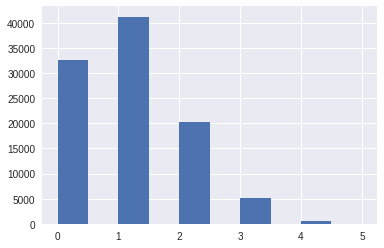

In [8]:
def test():
    dishwashers = ['Alice', 'Bob', 'Carl', 'Dave', 'Eric']
    breakers = [random.choice(dishwashers) for broken_dish in range(5)]
    return breakers.count('Carl')

tests = [test() for _ in range(100000)]

plt.hist(tests);

Under the null hypothesis, here's the mean number of dishes broken by Carl, and the standard deviation:

In [9]:
mean(tests), stdev(tests)

(1.00105, 0.8930715947048885)

Here's the **"standard score"** of Carl breaking 4 dishes. It's over 3 standard deviations from the mean.

> In statistics, the **[standard score](https://en.wikipedia.org/wiki/Standard_score)** is the signed number of standard deviations by which the value of an observation or data point differs from the mean value of what is being observed or measured. Standard scores are also called **z-scores.**

In [10]:
standard_score = (4 - mean(tests)) / stdev(tests)
print(standard_score)

3.358017450987218


Here's how often Carl breaks 4+ dishes in our Monte Carlo simulation of the null hypothesis:

In [11]:
sum(test >= 4 for test in tests)

666

As a percentage:

In [0]:
sum(test >= 4 for test in tests) / len(tests)

This is a **p-value**.


> Everyone I spoke with acould tell me the technical definition of a p-value — **the probability of getting results at least as extreme as the ones you observed, given that the null hypothesis is correct** — but almost no one could translate that into something easy to understand. — *[Not Even Scientists Can Easily Explain P-values](https://fivethirtyeight.com/features/not-even-scientists-can-easily-explain-p-values/)*

In [0]:
p_value = mean(test >= 4 for test in tests)
print(p_value)

Reject the null hypothesis?

In [0]:
p_value < .05

(The p-value can be calculated in one line of code, but it becomes harder to read.)

In [0]:
mean(sum(random.choice('abcde')=='c' for _ in range(5)) >= 4 for _ in range(100000))

### How could we do it without computer programming superpowers?

1. Five sided dice and a lot of patience? (Half a million rolls)
2. Or with combinatorial probability:

There are 4 * 5 ways to get 4 C's

```
CCCCA
CCCCB
CCCCD
CCCCE

CCCAC
...

...
ECCCC
```

And 1 way to get 5 C's.

Out of 5**5 total possibilities.


In [0]:
(4*5 + 1) / 5**5

# 3. Are beer drinkers more attractive to mosquitoes?

## Are beer drinkers more attractive to mosquitoes?

#### Background
> Malaria and alcohol consumption both represent major public health problems. Alcohol consumption is rising in developing countries and, as efforts to manage malaria are expanded, understanding the links between malaria and alcohol consumption becomes crucial. Our aim was to ascertain the effect of beer consumption on human attractiveness to malaria mosquitoes in semi field conditions in Burkina Faso.

#### Figure 1
> (A) The two tents set up outdoors and connected to the two traps of the Y-olfactometer by lay-flat tubing, and the olfactometer room located between the two tents. (B) Fan drawing air from a tent to the olfactometer via lay-flat tubing. (C) The Y tube-olfactometer. 

![Figure 1](http://journals.plos.org/plosone/article/figure/image?size=large&id=10.1371/journal.pone.0009546.g001)

#### Methodology
> We used a Y tube-olfactometer designed to take advantage of the whole body odour (breath and skin emanations) as a stimulus to gauge human attractiveness to Anopheles gambiae (the primary African malaria vector) before and after volunteers consumed either beer (n = 25 volunteers and a total of 2500 mosquitoes tested) or water (n = 18 volunteers and a total of 1800 mosquitoes). 

### "Then they trapped and counted the mosquitos. Here's the data. 

These numbers are the numbers of mosquitoes that were collected in the traps for each of the volunteers."

In [0]:
beer = [27, 19, 20, 20, 23, 17, 21, 24, 31, 26, 28, 20, 27, 19, 25, 31, 24, 28, 24, 29, 21, 21, 18, 27, 20]
water = [21, 19, 13, 22, 15, 22, 15, 22, 20, 12, 24, 24, 21, 19, 18, 16, 23, 20]

### "They had 25 volunteers who drank beer and 18 who drank water."

In [14]:
len(beer), len(water)

(25, 18)

### "We can compute the average number of mosquitoes in each group ..."

In [15]:
mean(beer), stdev(beer)

(23.6, 4.133198922545748)

In [16]:
mean(water), stdev(water)

(19.22222222222222, 3.6711202899124045)

### "... and then subtract to find that the average person who drank beer attracted 4.4 more mosquitoes than the average water drinker."

In [17]:
effect_size = mean(beer) - mean(water)
print(effect_size)

4.37777777777778


### "And now we have a statistical question.

Is a difference of 4.4 sufficient evidence to claim that drinking beer makes you more attractive to mosquitoes?"

## Permutation Test

"If the skeptic (the null hypothesis) is right, these labels (beer or water) have absolutely no meaning. They carry no information. ..."

"And so what I can do is randomly shuffle them, then compute some new means, subtract the means, and get a new difference ..."

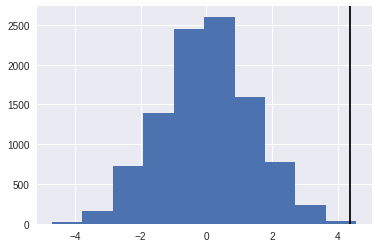

In [18]:
def test():
    # Shuffle the data
    combined = beer + water
    random.shuffle(combined)
    
    # Split into two groups
    split = len(beer)
    group1 = combined[:split]
    group2 = combined[split:]
    
    # Compare the means
    return mean(group1) - mean(group2)

# Repeat many times
tests = [test() for _ in range(10000)]

plt.hist(tests)
plt.axvline(effect_size, color='black');

Under the null hypothesis, here's the mean number of mosquitoes attracted by beer drinkers versus water drinkers, and the standard deviation:

In [19]:
mean(tests), stdev(tests)

(0.009035111111111103, 1.385247368742957)

The observed effect size of 4.4 more mosquitoes attracted by beer drinkers is over 3 standard deviations from the mean under the null hypothesis. (This is the z-score.)

In [20]:
standard_score = (effect_size - mean(tests)) / stdev(tests)
print(standard_score)

3.15376355533603


Here is the p-value: the probability of getting results at least as extreme as the ones you observed, if you assumed that the null hypothesis is correct.

In [21]:
p_value = mean(test >= effect_size for test in tests)
print(p_value)

0.0004


Reject the null hypothesis?

In [22]:
p_value < .05

True

### Conclusions
> Despite individual volunteer variation, **beer consumption consistently increased attractiveness to mosquitoes.** These results suggest that beer consumption is a risk factor for malaria and needs to be integrated into public health policies for the design of control measures. —[Lefèvre et al.](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0009546)

### How else could we do it?

We did null hypothesis significance testing computationally, using a permutation test.

We could also do it analytically, using a ["t-test"](https://en.wikipedia.org/wiki/Student%27s_t-test):

In [23]:
from statsmodels.stats.weightstats import ttest_ind

test_statistic, p_value, degrees_of_freedom = ttest_ind(
    beer, water, alternative='larger', usevar='unequal')

p_value

0.00037370095395207643

# 4. Confidence intervals

> A **confidence interval** is a partial answer to the question: "How precise is my estimate of the effect size?" If you run an experiment and observe an effect, you might wonder whether you would see the same thing if you ran the experiment again. —*[Allen Downey](http://allendowney.blogspot.com/2015/03/statistical-inference-is-only-mostly.html)*

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


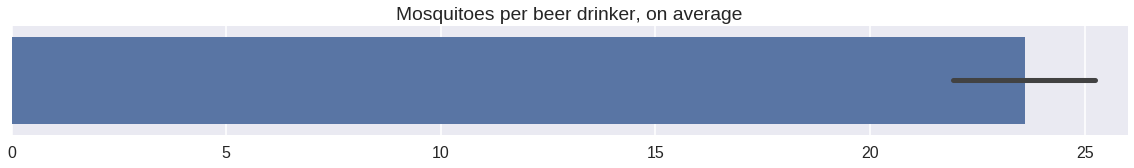

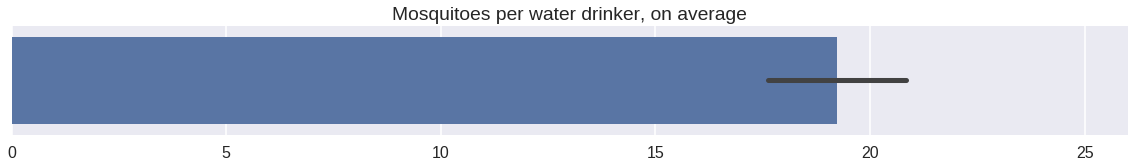

In [24]:
import seaborn as sns
sns.set_context('poster')

plt.figure(figsize=(20, 2))
plt.xlim(0, 26)
plt.title('Mosquitoes per beer drinker, on average')
sns.barplot(beer, ci=95)

plt.figure(figsize=(20, 2))
plt.xlim(0, 26)
plt.title('Mosquitoes per water drinker, on average')
sns.barplot(water, ci=95);

> **Idea:** Simulate the distribution by drawing samples with replacement. **Motivation:** The data estimates its own distribution — we draw samples from this distribution. —*[Jake VanderPlas](https://speakerdeck.com/jakevdp/statistics-for-hackers?slide=78)*

In [0]:
def bootstrap_sample(items):
    # Random resample *with replacement*
    return random.choices(items, k=len(items))

In [26]:
sorted(water), mean(water)

([12, 13, 15, 15, 16, 18, 19, 19, 20, 20, 21, 21, 22, 22, 22, 23, 24, 24],
 19.22222222222222)

In [27]:
sample = bootstrap_sample(water)
sorted(sample), mean(sample)

([12, 13, 15, 15, 15, 16, 16, 16, 18, 18, 18, 20, 20, 20, 21, 22, 23, 24],
 17.88888888888889)

In [28]:
sample = bootstrap_sample(water)
sorted(sample), mean(sample)

([12, 15, 15, 16, 16, 16, 19, 20, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24],
 19.666666666666668)

In [0]:
effect_sizes = [mean(bootstrap_sample(beer)) - mean(bootstrap_sample(water)) 
                for _ in range(10000)]

In [31]:
def percentile(x, p):
    # x: List of numbers
    # p: Percentile, between 0 and 100
    i = round(len(x) * p/100)
    return sorted(x)[i]
    
percentile(effect_sizes, 2.5), percentile(effect_sizes, 97.5)

(2.1622222222222227, 6.746666666666666)

# Links


John Rauser
- Statistics Without the Agonizing Pain, Strata 2014 — [video](https://www.youtube.com/watch?v=5Dnw46eC-0o) (12 minutes)

Jake VanderPlas
- Statistics for Hackers, PyCon 2016 — [slides](https://speakerdeck.com/jakevdp/statistics-for-hackers) / [video](https://www.youtube.com/watch?v=Iq9DzN6mvYA) (32 minutes) 

Allen Downey 
- Computational Statistics — [tutorial](http://allendowney.github.io/CompStats/tutorial.html) / [video](https://www.youtube.com/results?search_query=allen+downey+computational+statistics)
- Think Stats — [book](https://greenteapress.com/wp/think-stats-2e/)
- Statistical inference is only mostly wrong — [blog post](http://allendowney.blogspot.com/2015/03/statistical-inference-is-only-mostly.html)

FiveThirtyEight
- [Not even scientists can easily explain p-values](https://fivethirtyeight.com/features/not-even-scientists-can-easily-explain-p-values/)
- [Interactive "p-hacking" demo](https://fivethirtyeight.com/features/science-isnt-broken/)

Priceonomics
- [Why the father of modern statistics didn’t believe smoking caused cancer](https://priceonomics.com/why-the-father-of-modern-statistics-didnt-believe/)

xkcd comics
- [Significant](https://www.explainxkcd.com/wiki/index.php/882:_Significant)
- [P-Values](https://www.explainxkcd.com/wiki/index.php/1478:_P-Values)
- [More](https://www.explainxkcd.com/wiki/index.php/Category:Statistics)